In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('images/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('images/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('images/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

In [3]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [4]:
hist_values.shape

(256, 1)

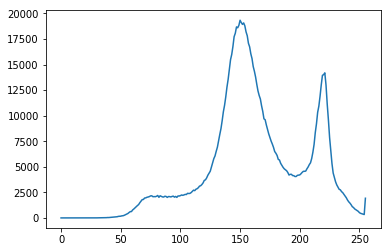

In [5]:
plt.plot(hist_values) #plotting blue in image

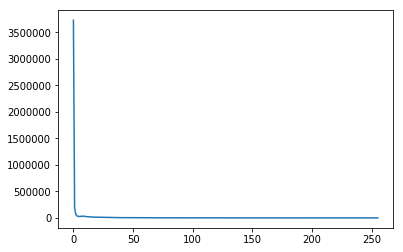

In [7]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values) #plotting blue in image

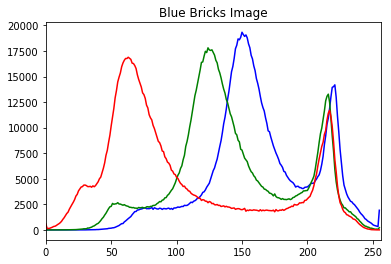

In [8]:
#Plotting 3 Color Histograms
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

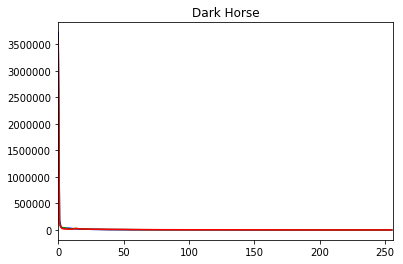

In [9]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse')
plt.show()

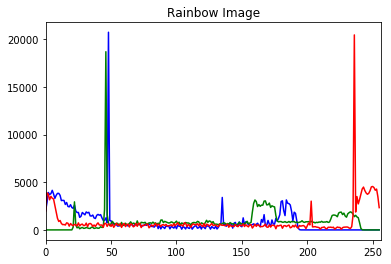

In [11]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

# Masking

(550, 413, 3)


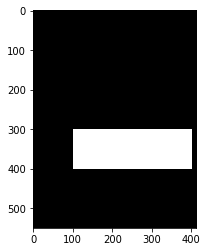

In [15]:
img = rainbow
print(img.shape)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255
plt.imshow(mask,cmap='gray')

In [16]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

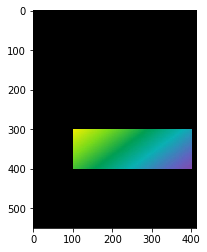

In [17]:
plt.imshow(show_masked_img)

Text(0.5, 1.0, 'Histogram for RED values of the full image')

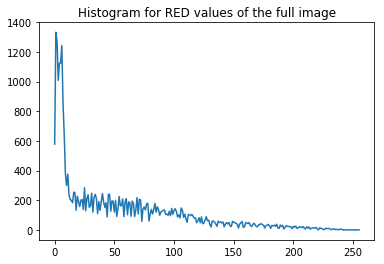

In [19]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values Masked')

Text(0.5, 1.0, 'Histogram for RED values for full Rainbow')

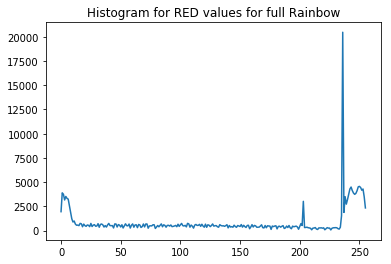

In [20]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_full_values_red)
plt.title('Histogram for RED values for full Rainbow')

# Histogram Equalization

In [22]:
gorilla = cv2.imread('images/gorilla.jpg',0)
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

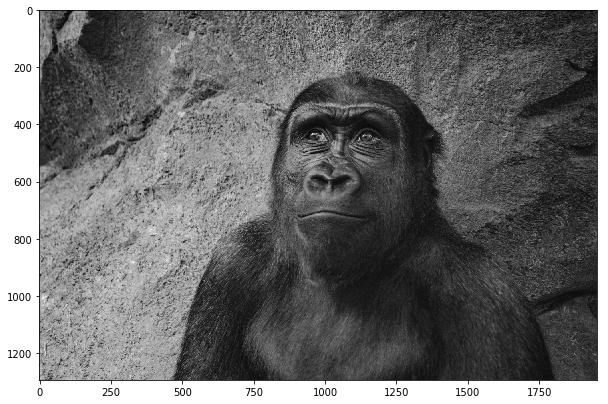

In [24]:
#Single Channel (Grayscale)
display(gorilla,cmap='gray')

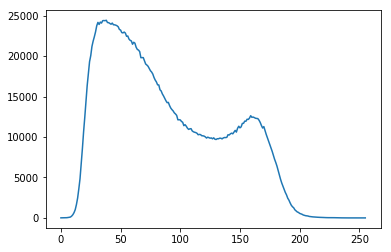

In [28]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

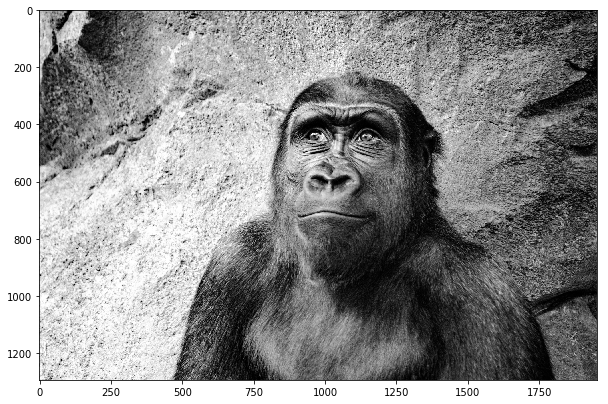

In [29]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,cmap='gray')

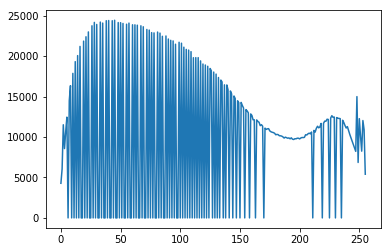

In [30]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

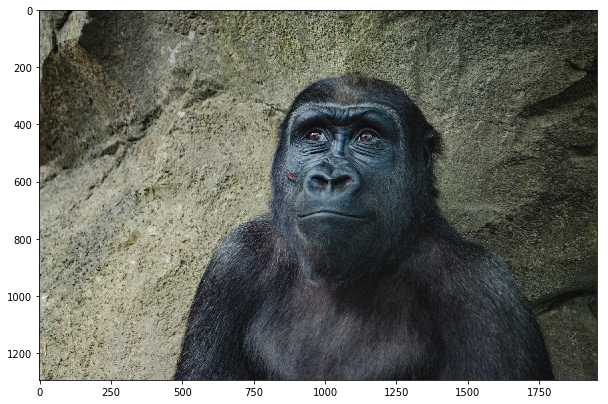

In [32]:
#Color Images
color_gorilla = cv2.imread('images/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
display(show_gorilla)

In [33]:
# Grab V channel
hsv[:,:,2]
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

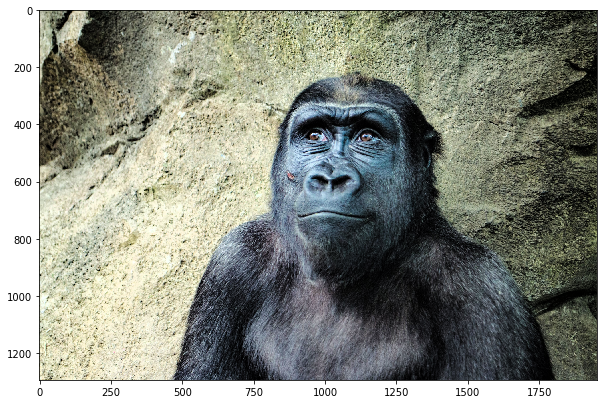

In [34]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)

In [ ]:
#assesment
